In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Titanic_Train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.drop(columns = ['Cabin'], inplace = True)
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


**Survived is the Target Categorical Variable**

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [7]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
print('0 % = {}, 1 % = {}'.format(round((54900/(549+342)),2), round((34200/(549+342)),2)))

0 % = 61.62, 1 % = 38.38


**Treating Missing Values of Independent variables (Age by 'Mean' & Embarkation by 'Mode')**

In [9]:
data['Age'].shape

(891,)

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
column_age = data['Age'].values.reshape(-1,1)
column_age.shape

(891, 1)

In [12]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data['Age'] = impute.fit_transform(column_age)

In [13]:
data['Embarked'].shape

(891,)

In [14]:
column_embarked = data['Embarked'].values.reshape(-1,1)
column_embarked.shape

(891, 1)

In [15]:
impute_embarked = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Embarked'] = impute_embarked.fit_transform(column_embarked)

In [16]:
mapping_gender = {'male' : 0,
                 'female' : 1}
data['Sex'] = data['Sex'].map(mapping_gender)
data['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [17]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
mapping_embarked = {'S' : 0,
                   'C' : 1,
                   'Q' : 2}
data['Embarked'] = data['Embarked'].map(mapping_embarked)

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


**Data set is free of Missing Values**

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [22]:
data['Sex'].unique()

array([0, 1], dtype=int64)

In [23]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

**Age** column can be split to more columns = ***Binning***

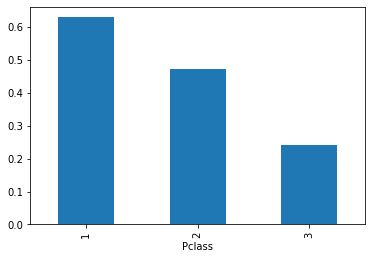

In [24]:
data.groupby('Pclass')['Survived'].mean().plot(kind = 'bar')

**Pclass** can be split into 2 more columns = **Dummy Variables**

**Creating Dummy Variables** ("Pclass")

In [25]:
data = pd.get_dummies(data, columns = ['Pclass', 'Embarked'], drop_first = True)
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,0


**Binning** ("Age")

In [26]:
len(data['Age'].unique())

89

In [27]:
Age_table = data.groupby('Age').agg({'Survived':'mean'}).sort_values('Survived', ascending = True)
Age_table.head()

,Survived
Age,
61.0,0.0
23.5,0.0
28.5,0.0
20.5,0.0
30.5,0.0


In [28]:
Age_table['Age_Group'] = pd.cut(Age_table['Survived'], bins = 8, labels = ['Age_Group_0', 'Age_Group_1',
                                                                          'Age_Group_2', 'Age_Group_3',
                                                                           'Age_Group_4', 'Age_Group_5',
                                                                          'Age_Group_6', 'Age_Group_7'], include_lowest = True)
Age_table = Age_table.drop(columns = ['Survived'])
Age_table.tail()

,Age_Group
Age,
0.83,Age_Group_7
0.75,Age_Group_7
0.67,Age_Group_7
53.00,Age_Group_7
80.00,Age_Group_7


In [29]:
data = pd.merge(data, Age_table, left_on = 'Age', how = 'left', right_index = True)
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Age_Group
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,0,Age_Group_3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0,1,0,Age_Group_3
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,Age_Group_2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0,0,Age_Group_4
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,0,Age_Group_4


In [30]:
data = pd.get_dummies(data, columns = ['Age_Group'], drop_first = True)
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Age_Group_Age_Group_1,Age_Group_Age_Group_2,Age_Group_Age_Group_3,Age_Group_Age_Group_4,Age_Group_Age_Group_5,Age_Group_Age_Group_6,Age_Group_Age_Group_7
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0,0,0,0,1,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0,1,0,0,0,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,0,0,0,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0,0,0,0,0,1,0,0,0


In [31]:
data = data.drop(columns = 'Age')

In [32]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
fare_table = data.groupby('Fare').agg({'Survived':'mean'}).sort_values('Survived', ascending = True)
fare_table['Fare_Group'] = pd.cut(fare_table['Survived'], bins = 10, labels = ['Fare_Group_0', 'Fare_Group_1',
                                                                              'Fare_Group_2', 'Fare_Group_3',
                                                                              'Fare_Group_4', 'Fare_Group_5',
                                                                              'Fare_Group_6', 'Fare_Group_7',
                                                                              'Fare_Group_8','Fare_Group_9'], include_lowest = True)
fare_table = fare_table.drop(columns = 'Survived')
fare_table.head()

,Fare_Group
Fare,
8.7125,Fare_Group_0
32.3208,Fare_Group_0
11.5000,Fare_Group_0
33.5000,Fare_Group_0
34.0208,Fare_Group_0


In [34]:
data = pd.merge(data, fare_table, left_on = 'Fare', how = 'left', right_index = True)
data.head()

,PassengerId,Survived,Name,Sex,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Age_Group_Age_Group_1,Age_Group_Age_Group_2,Age_Group_Age_Group_3,Age_Group_Age_Group_4,Age_Group_Age_Group_5,Age_Group_Age_Group_6,Age_Group_Age_Group_7,Fare_Group
0,1,0,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,0,1,0,0,0,0,1,0,0,0,0,Fare_Group_0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,0,0,1,0,0,0,1,0,0,0,0,Fare_Group_9
2,3,1,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1,0,0,0,0,0,Fare_Group_4
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,0,0,0,0,0,0,0,1,0,0,0,Fare_Group_5
4,5,0,"Allen, Mr. William Henry",0,0,0,373450,8.0500,0,1,0,0,0,0,0,1,0,0,0,Fare_Group_1


In [35]:
data = pd.get_dummies(data, columns = ['Fare_Group'], drop_first = True)
data.head()

,PassengerId,Survived,Name,Sex,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,...,Age_Group_Age_Group_7,Fare_Group_Fare_Group_1,Fare_Group_Fare_Group_2,Fare_Group_Fare_Group_3,Fare_Group_Fare_Group_4,Fare_Group_Fare_Group_5,Fare_Group_Fare_Group_6,Fare_Group_Fare_Group_7,Fare_Group_Fare_Group_8,Fare_Group_Fare_Group_9
0,1,0,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,"Allen, Mr. William Henry",0,0,0,373450,8.0500,0,1,...,0,1,0,0,0,0,0,0,0,0


In [36]:
data = data.drop(columns = 'Fare')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PassengerId              891 non-null    int64 
 1   Survived                 891 non-null    int64 
 2   Name                     891 non-null    object
 3   Sex                      891 non-null    int64 
 4   SibSp                    891 non-null    int64 
 5   Parch                    891 non-null    int64 
 6   Ticket                   891 non-null    object
 7   Pclass_2                 891 non-null    uint8 
 8   Pclass_3                 891 non-null    uint8 
 9   Embarked_1               891 non-null    uint8 
 10  Embarked_2               891 non-null    uint8 
 11  Age_Group_Age_Group_1    891 non-null    uint8 
 12  Age_Group_Age_Group_2    891 non-null    uint8 
 13  Age_Group_Age_Group_3    891 non-null    uint8 
 14  Age_Group_Age_Group_4    891 non-null    u

Seperating target and independent variables

In [38]:
X = data.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Survived'])
y = data['Survived']

Scaling the Dataset

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

Splitting Train and Test Data Sets

In [40]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 23), (179, 23), (712,), (179,))

**Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [42]:
classifier.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [43]:
predicted_values = classifier.predict(x_test)
predicted_prob = classifier.predict_proba(x_test)

In [44]:
predicted_values

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [45]:
predicted_prob, predicted_prob.shape

(array([[5.65122546e-04, 9.99434877e-01],
        [5.57769698e-01, 4.42230302e-01],
        [4.86925900e-01, 5.13074100e-01],
        [5.82753184e-01, 4.17246816e-01],
        [2.56374776e-01, 7.43625224e-01],
        [7.56649828e-01, 2.43350172e-01],
        [5.89350849e-01, 4.10649151e-01],
        [6.97142148e-01, 3.02857852e-01],
        [8.48800196e-01, 1.51199804e-01],
        [9.77838968e-01, 2.21610325e-02],
        [6.97142148e-01, 3.02857852e-01],
        [1.97281631e-01, 8.02718369e-01],
        [5.65122546e-04, 9.99434877e-01],
        [5.95867146e-01, 4.04132854e-01],
        [1.48779919e-01, 8.51220081e-01],
        [3.09021729e-02, 9.69097827e-01],
        [2.90677781e-01, 7.09322219e-01],
        [1.49946109e-02, 9.85005389e-01],
        [6.08826929e-01, 3.91173071e-01],
        [2.45596619e-04, 9.99754403e-01],
        [2.45487422e-01, 7.54512578e-01],
        [1.97281631e-01, 8.02718369e-01],
        [9.86981957e-01, 1.30180434e-02],
        [9.54411539e-01, 4.5588460

**Evaluation Metrics**

Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
cm

array([[96, 15],
       [ 9, 59]], dtype=int64)

Accuracy

In [47]:
classifier.score(x_test, y_test)

0.8659217877094972

Precision

In [48]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predicted_values)
precision

0.7972972972972973

Recall

In [49]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predicted_values)
recall

0.8676470588235294

In [50]:
f1_score = 2/((1/precision)+(1/recall))
f1_score

0.8309859154929579

In [51]:
from sklearn.metrics import precision_recall_fscore_support as prfs
Precision, Recall, F_score, Support = prfs(y_test, predicted_values)
Precision

array([0.91428571, 0.7972973 ])

In [52]:
Recall

array([0.86486486, 0.86764706])

In [53]:
F_score

array([0.88888889, 0.83098592])

In [54]:
Support

array([111,  68], dtype=int64)

**Classification Report** is for just visual purpose. Can not be used in suitable cases

In [55]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predicted_values)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       111
           1       0.80      0.87      0.83        68

    accuracy                           0.87       179
   macro avg       0.86      0.87      0.86       179
weighted avg       0.87      0.87      0.87       179



**Precision - Recall Curve**

In [56]:
from sklearn.metrics import precision_recall_curve as prc
precision_points, recall_points, threshold_points = prc(y_test, predicted_prob[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((99,), (99,), (98,))

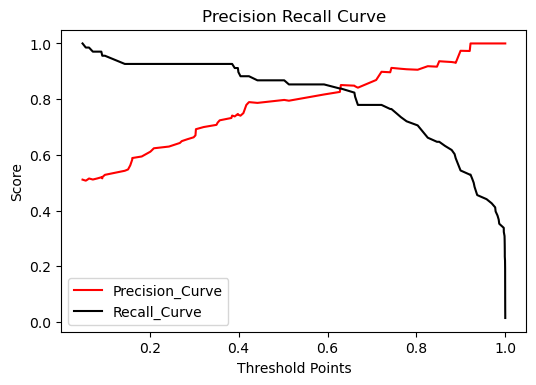

In [57]:
plt.figure(dpi = 100)
plt.plot(threshold_points, precision_points[:-1], color = 'red', label = "Precision_Curve")
plt.plot(threshold_points, recall_points[:-1], color = 'black', label = "Recall_Curve")
plt.xlabel("Threshold Points")
plt.ylabel("Score")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

**AUC ROC Curve**

ROC Curves are used widely to measure the performance of the models in data science

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_prob[:,1])

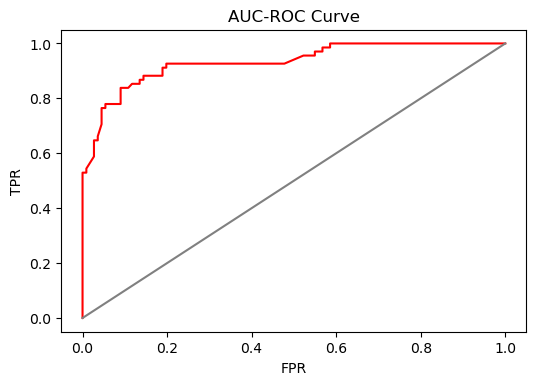

In [59]:
plt.figure(dpi = 100)
plt.plot(fpr, tpr, color = 'red')
plt.plot([0,1],[0,1], color = 'grey', label = 'baseline')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("AUC-ROC Curve")
plt.show()

**Coefficient Plot**

In [60]:
c = classifier.coef_.reshape(-1)
ex = X.columns

coeff_table = pd.DataFrame({
    "Coefficients" : c,
    "Variable" : ex
})

coeff_table = coeff_table.sort_values(by = 'Coefficients')
coeff_table.head()

,Coefficients,Variable
1,-0.425854,SibSp
2,-0.300784,Parch
6,-0.035347,Embarked_2
5,0.028025,Embarked_1
3,0.066648,Pclass_2


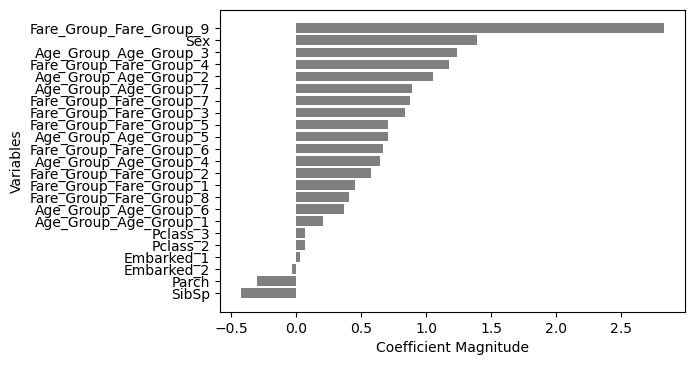

In [61]:
plt.figure(dpi = 100)
plt.barh(coeff_table['Variable'], coeff_table['Coefficients'], color = 'grey')
plt.xlabel('Coefficient Magnitude', fontsize = 10)
plt.ylabel('Variables', fontsize = 10)
plt.show()